In [8]:
!pip install -q kaggle

In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saniyamaner786","key":"ceb1e2cd2d79f9e63701716c28c47c6c"}'}

In [10]:
import os

# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Move kaggle (3).json to the correct location and rename it to kaggle.json
!cp '/content/kaggle.json' ~/.kaggle/kaggle.json

# Set appropriate permissions
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
License(s): other
 98% 1.42G/1.45G [00:11<00:00, 223MB/s]
100% 1.45G/1.45G [00:11<00:00, 130MB/s]


In [12]:
!unzip wildfire-prediction-dataset.zip -d wildfire_data

Streaming output truncated to the last 5000 lines.
  inflating: wildfire_data/valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: wildfire_data/v

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from PIL import ImageFile

In [14]:
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [15]:
train_dir='/content/wildfire_data/train'
test_dir='/content/wildfire_data/test'

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
    )

Found 30250 images belonging to 2 classes.


In [18]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 6300 images belonging to 2 classes.


In [19]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


946/946 ━━━━━━━━━━━━━━━━━━━━ 72s 71ms/step - accuracy: 0.8608 - loss: 0.3136 - val_accuracy: 0.9486 - val_loss: 0.1391
Epoch 2/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.9339 - loss: 0.1830 - val_accuracy: 0.9544 - val_loss: 0.1254
Epoch 3/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9405 - loss: 0.1604 - val_accuracy: 0.9565 - val_loss: 0.1263
Epoch 4/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9460 - loss: 0.1495 - val_accuracy: 0.9595 - val_loss: 0.1131
Epoch 5/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 62s 65ms/step - accuracy: 0.9519 - loss: 0.1319 - val_accuracy: 0.9540 - val_loss: 0.1299
Epoch 6/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.9543 - loss: 0.1267 - val_accuracy: 0.9595 - val_loss: 0.1236
Epoch 7/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9553 - loss: 0.1201 - val_accuracy: 0.9662 - val_loss: 0.0996
Epoch 8/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9612 - loss: 0.1092 - val_accurac

In [23]:
loss,accuracy=model.evaluate(test_generator)
print(f"Test Accuracy:{accuracy*100:.2f}%")

197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9694 - loss: 0.0882
Test Accuracy:96.75%


In [24]:
predictions=model.predict(test_generator)
y_pred=(predictions > 0.5).astype(int)
y_true=test_generator.classes



197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step


In [25]:
print('classigication Rport:\n',classification_report(y_true,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_true,y_pred))

classigication Rport:
               precision    recall  f1-score   support

           0       0.44      0.45      0.45      2820
           1       0.55      0.54      0.55      3480

    accuracy                           0.50      6300
   macro avg       0.50      0.50      0.50      6300
weighted avg       0.50      0.50      0.50      6300

Confusion Matrix:
 [[1276 1544]
 [1595 1885]]


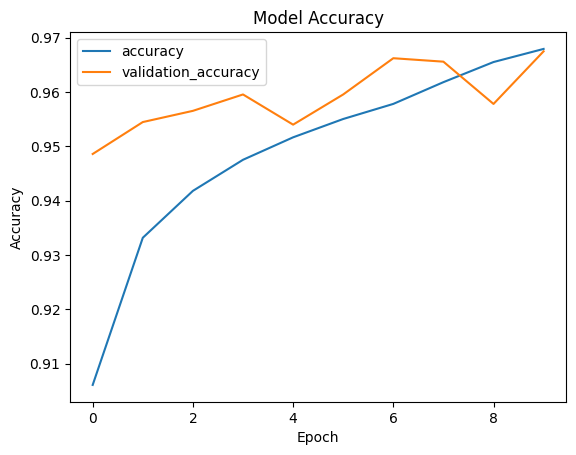

In [26]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
import joblib
joblib.dump(model,'forest_fire_model.pkl')


['forest_fire_model.pkl']

In [28]:
model.save('forest_fire_model.h5')


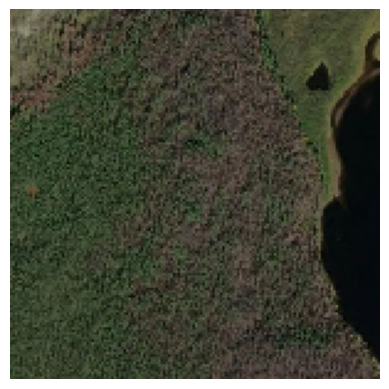

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
prediction: window


In [36]:
from tensorflow.keras.preprocessing import image
def predict_and_show_image(image_path):
  img=image.load_img(image_path,target_size=(150,150))
  img_array=image.img_to_array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  prediction=model.predict(img_array)
  print("prediction:","window" if prediction[0]>0.5 else "No wildfire")
predict_and_show_image('/content/wildfire_data/test/wildfire/-61.6969,51.3014.jpg')
